# Predicting Energy efficiency

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

Dataset used was imported from https://archive.ics.uci.edu/ml/datasets/Energy+efficiency

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Read the dataset
enb_data = pd.read_excel('D:\\Subha\\Projects\\Electricity\\ENB2012_data.xlsx')

In [3]:
# Quick glimpse of the dataset
enb_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


We could rename the column names to make things easier for us.
Based on the information in the website the attribute information is given below:

#### Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
- X1 Relative Compactness
- X2 Surface Area
- X3 Wall Area
- X4 Roof Area
- X5 Overall Height
- X6 Orientation
- X7 Glazing Area
- X8 Glazing Area Distribution
- y1 Heating Load
- y2 Cooling Load

In [4]:
enb_data = enb_data.rename(columns = {'X1':'rel_compactness', 'X2' : 'surface_area', 'X3' : 'wall_area', 'X4' : 'roof_area',
                           'X5' : 'overall_height', 'X6' : 'orientation', 'X7' : 'glazing_area', 'X8' : 'glaze_area_dist',
                          'Y1' : 'heat_load', 'Y2' : 'cold_load'})
enb_data

,rel_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glaze_area_dist,heat_load,cold_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [5]:
enb_data.describe()

,rel_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glaze_area_dist,heat_load,cold_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


So we have 768 rows of 10 features. Are there any null values?

In [6]:
enb_data.isna().sum()

rel_compactness    0
surface_area       0
wall_area          0
roof_area          0
overall_height     0
orientation        0
glazing_area       0
glaze_area_dist    0
heat_load          0
cold_load          0
dtype: int64

We will try to predict the heat load and the cold load based on all other features. In order to get an idea of the distribution and correlation of the features, we can visualise the dataset with the seaborn pair plot function. 

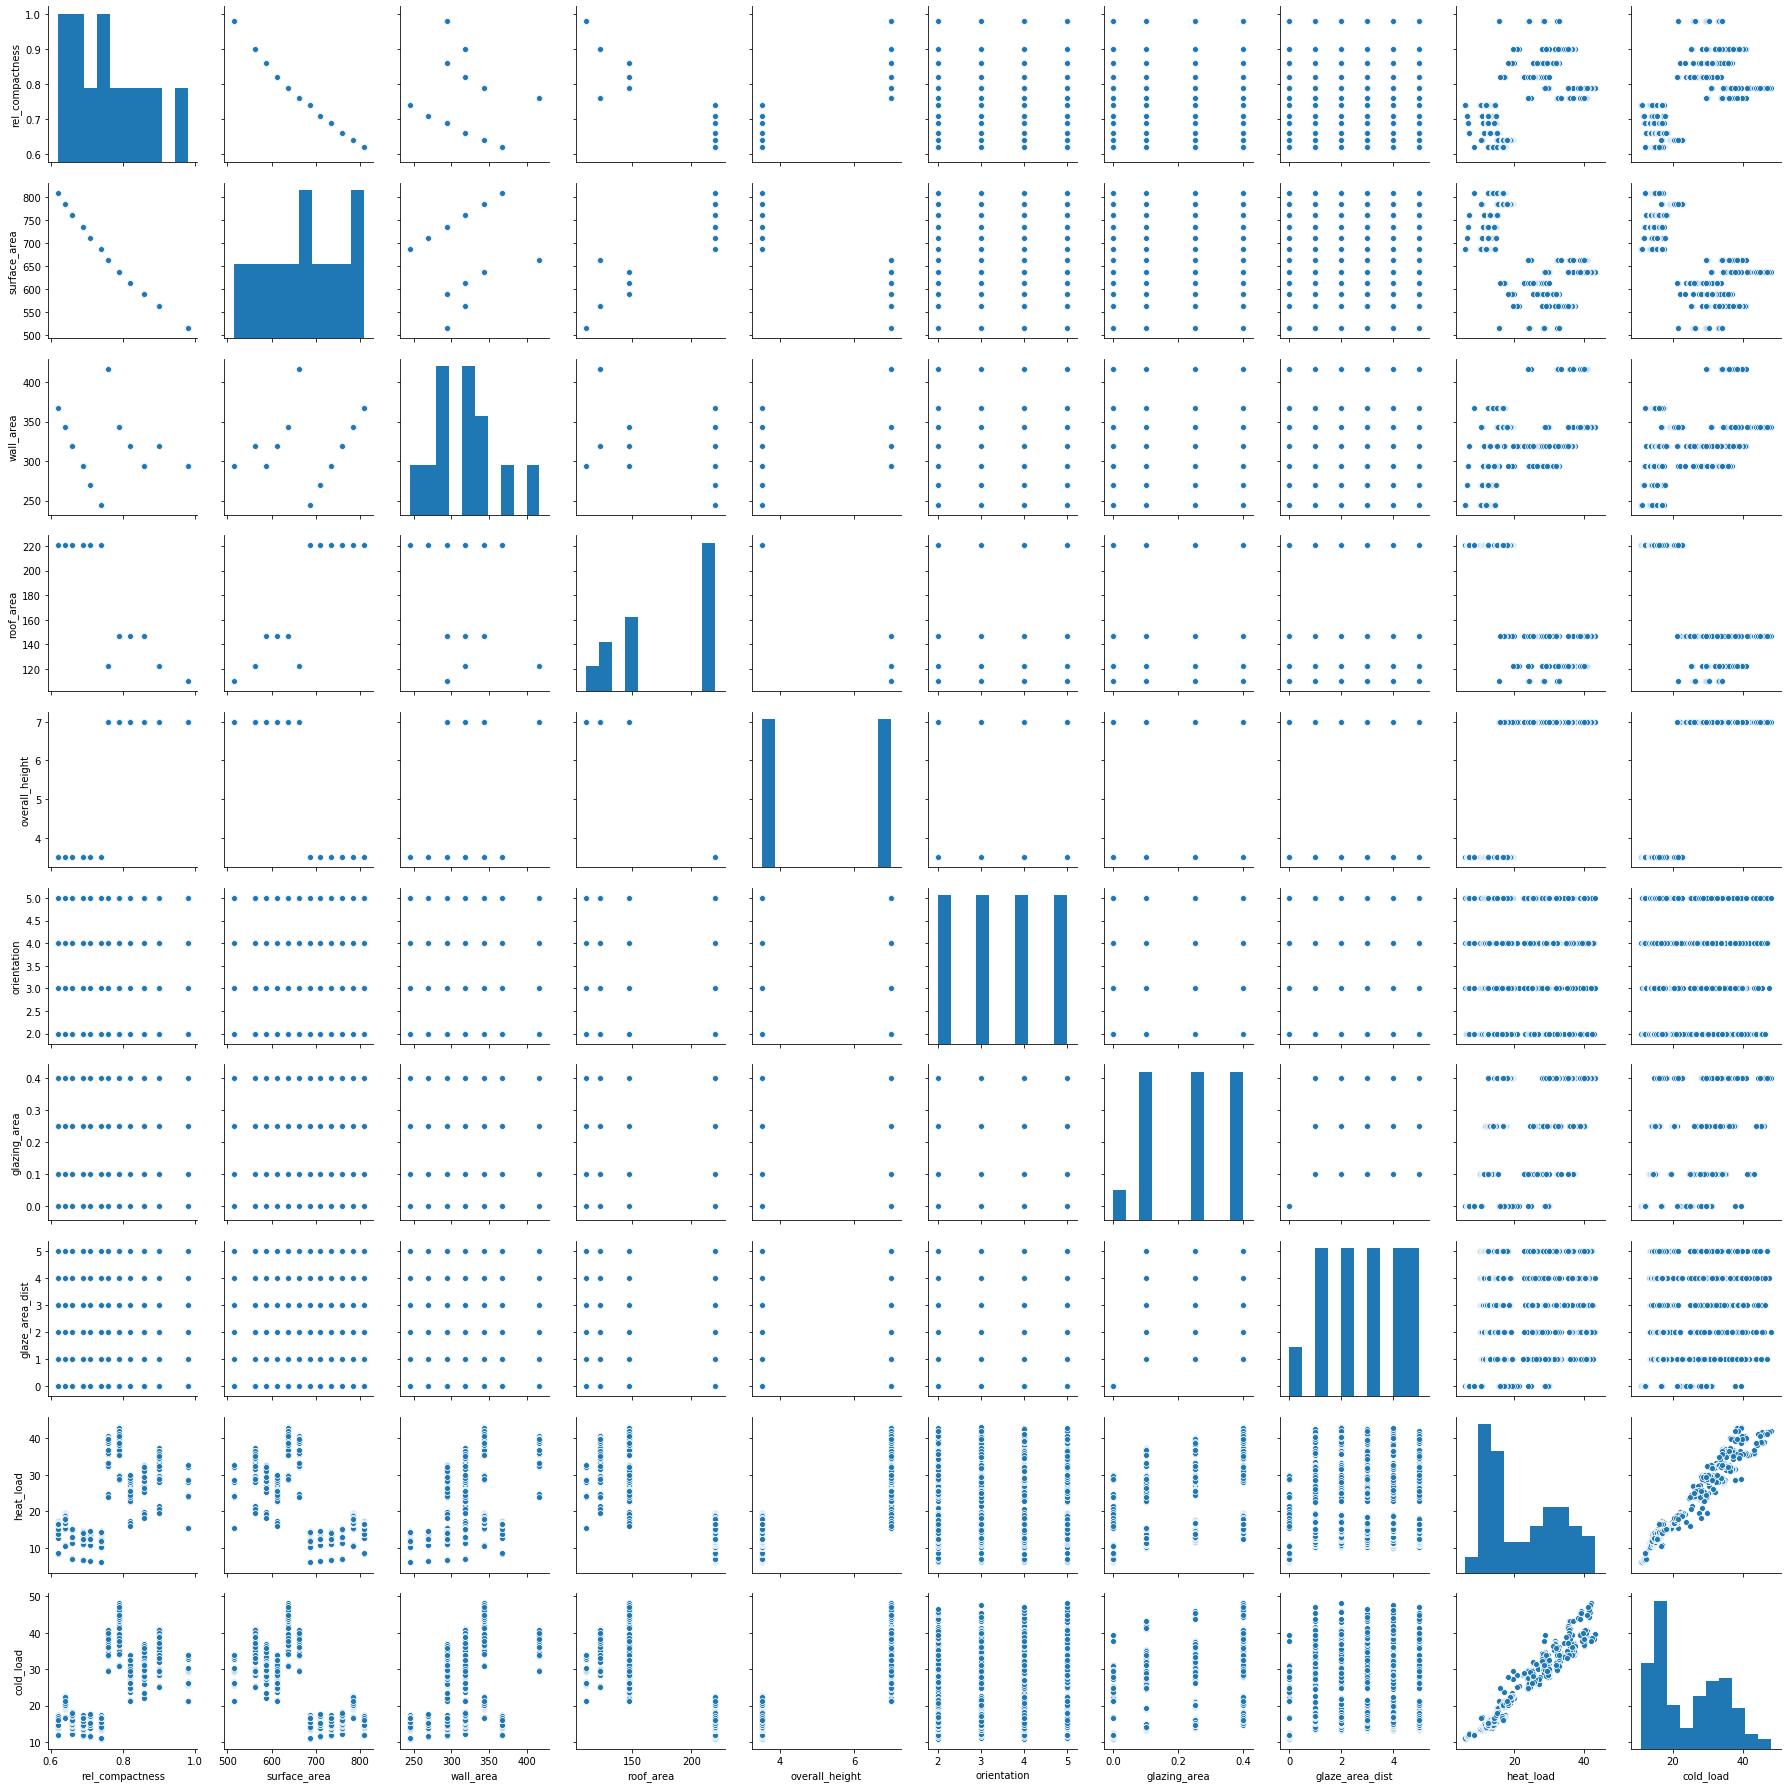

In [7]:
sns.pairplot(enb_data)

However this seems to be too difficult to read via a single graph, so we plot few variables at a time!

### Exploratory Data Analysis

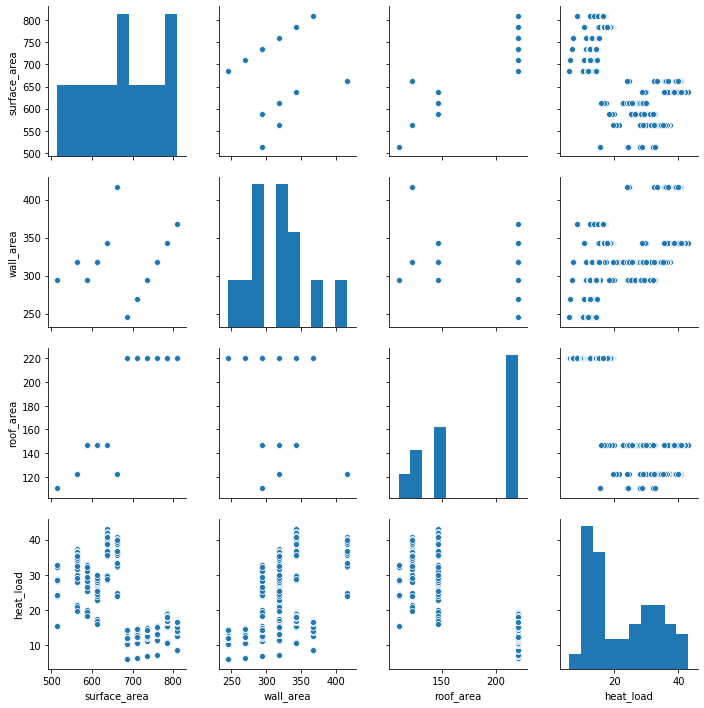

In [8]:
sns.pairplot(enb_data, vars=['surface_area','wall_area','roof_area','heat_load'])

From the above graph we can get a rough idea about any correlations that exist within the features. These relationships come in handy when we try to predict our target variable. For example we can roughly gather the following correlations:

#### Correlations
- Buildings with large surface area have lower heat load and vice versa
- Similarly some buildings with large roof area also have lower heat load
- Wall area seems a bit evenly distributed however we still see some buildings with large wall area having higher heat load
- There seems to be an existing correlation between surface area, wall area and roof area. However this is not very clear

#### Data points distribution / Outliers
- The distribution of the heat load seems to be skewed with more buildings towards the lower end
- There are some buildings with very high surface area

#### Other
- The dataset has two distinct types (or clusters) of surface area correlations. 
- Perhaps there are few unique values in the roof area ? Perhaps other variables too ?

In [9]:
enb_data.nunique()

rel_compactness     12
surface_area        12
wall_area            7
roof_area            4
overall_height       2
orientation          4
glazing_area         4
glaze_area_dist      6
heat_load          587
cold_load          636
dtype: int64

Our suspicions are correct, there are only few unique values in all of the input fields. We'll keep this in mind and continue looking for patterns in the data. Looking into the cold load factor, we plot the below: 

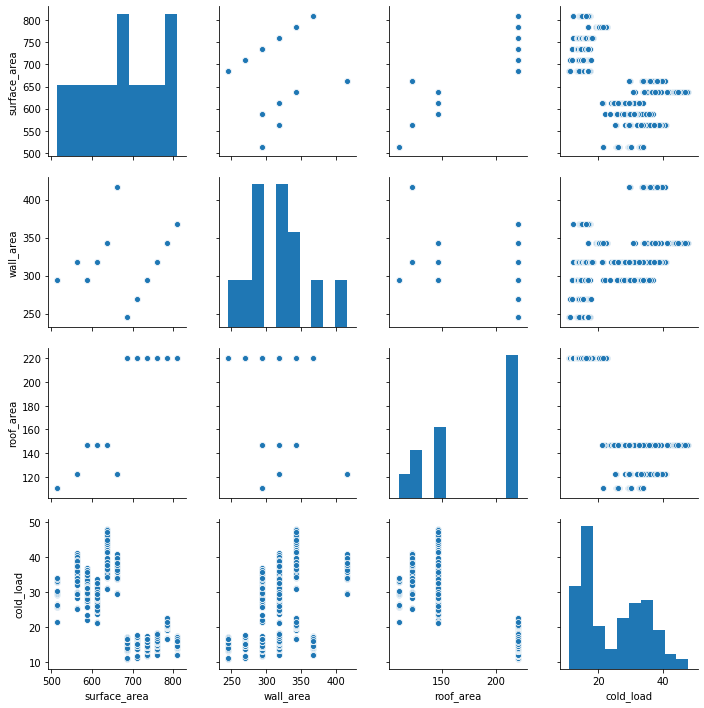

In [10]:
sns.pairplot(enb_data, vars=['surface_area','wall_area','roof_area','cold_load'])

The correlations between cold load and the area features are strikingly similar to the heat load relationships.

How about the other variables? What relationships exist with relative compactness, height, orientation and glaze areas?

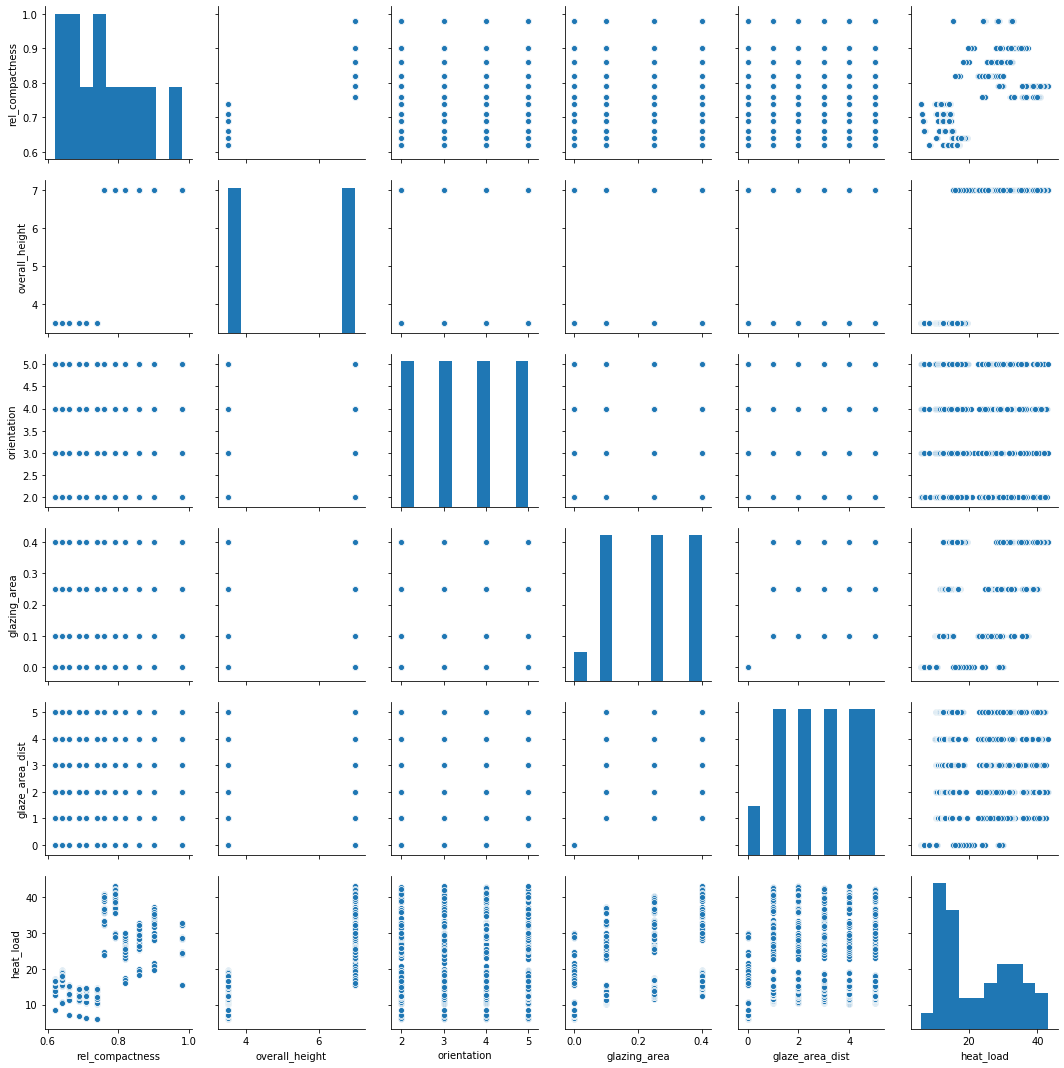

In [11]:
sns.pairplot(enb_data, vars = ['rel_compactness','overall_height','orientation','glazing_area', 'glaze_area_dist', 'heat_load'])

It might be difficult to draw relationships with few unique values in the features. But we can gather the following:

- For many buildings, when the relative compactness is low, the heat load is lower
- Most of the buildings having higher height have higher heat load
- A smaller group of buildings have lower height and lower heat load
- There are no clear signs of relationships in the other variables

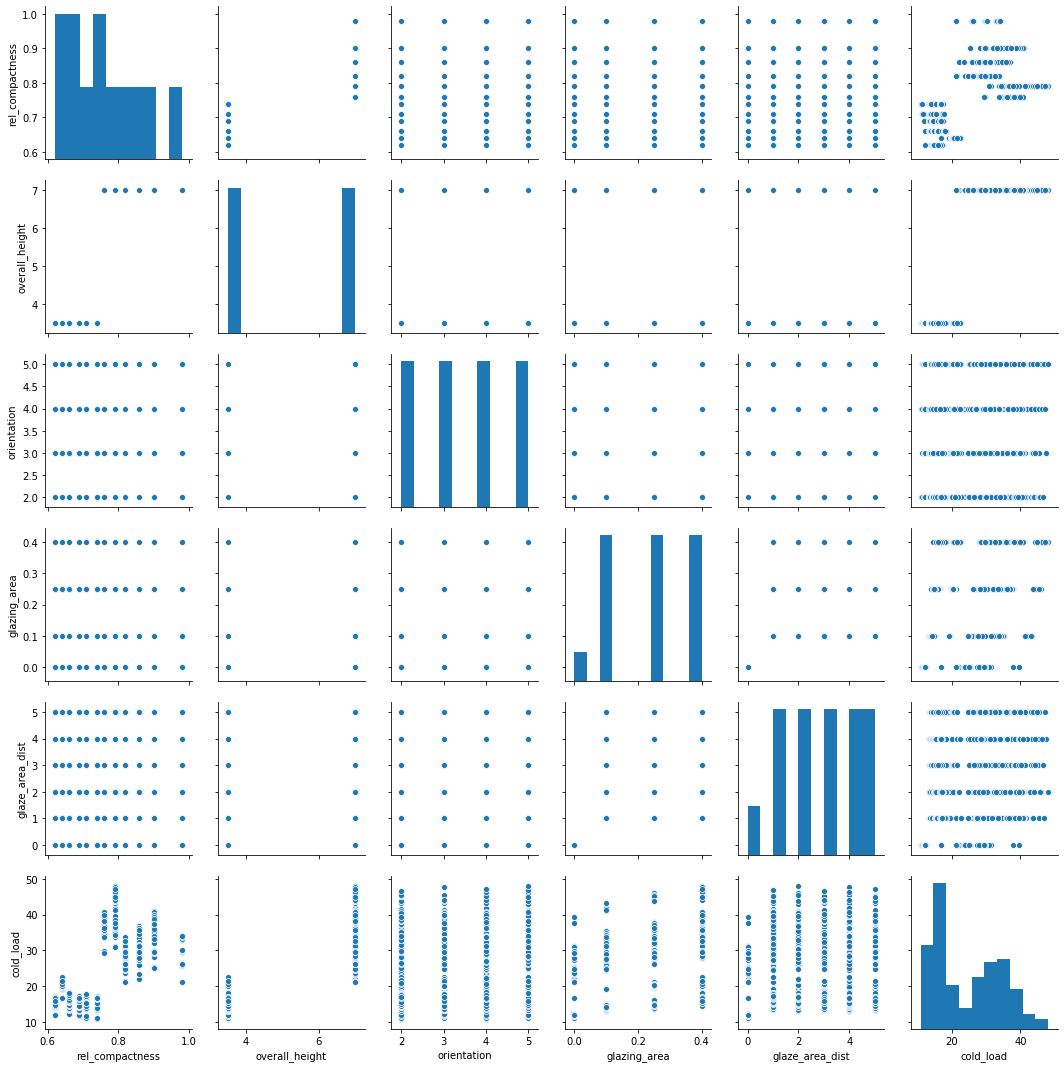

In [12]:
sns.pairplot(enb_data, vars = ['rel_compactness','overall_height','orientation','glazing_area', 'glaze_area_dist', 'cold_load'])

As expected the cold load relationships are similar to the heat loads. But what about the relationship between cold load and heat load (both our target variables)?

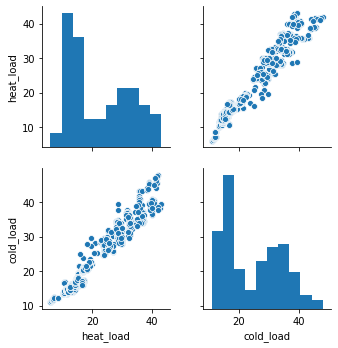

In [13]:
sns.pairplot(enb_data,vars = ['heat_load','cold_load'])

As a final step, we can also plot the Pearson Correlation Coefficient to test whether our assumptions are true

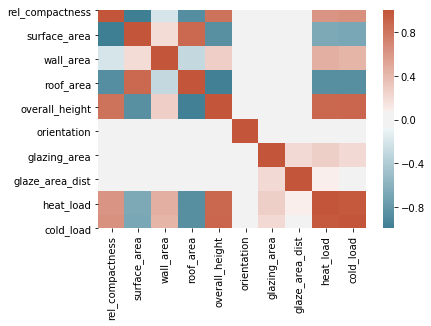

In [14]:
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(enb_data.corr(), cmap = cmap)

So in summary:

- Heat load and cold load are directly proportional to each other
- Many of the input variables have few unique values. Maybe it's better to treat them as categories?
- There are some relationships that can be noticed via visualising
- Through a correlation coefficient plot we can also notice that the highest correlations to the target variables are relative compactness, wall area, overall height and glazing area

### Baseline Model - Heat Load

Let's fit a baseline model with all the features i.e. not doing any feature engineering or preprocessing. Even though all input variables have few values each, the target variable appears to be continuous. Therefore we require a muliticlass regression model. For the sake of a simplicity in the baseline model we will fit 1 model to predict heat load

#### Splitting into train and test (with X,y variables)

In [17]:
X = enb_data.drop(['heat_load','cold_load'],axis=1)
y = enb_data['heat_load']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Fit a linear regression model to the train set and make predictions for the test set

In [20]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
pred = linear_model.predict(X_test)

We'll now check the predictions against the actual values by using the RMSE and R2 

In [29]:
test_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
test_r2 = r2_score(y_test, pred)
print('RMSE is ', test_rmse)
print('R2 value is ',test_r2)

RMSE is  3.1777209043097883
R2 value is  0.9085551832835094


#### Fit a SVM model to the train set and predict for the test

In [32]:
from sklearn import svm
svm_model = svm.SVR()
svm_model.fit(X_train, y_train)
pred = svm_model.predict(X_test)

C:\Users\subha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
test_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
test_r2 = r2_score(y_test, pred)
print('RMSE is ', test_rmse)
print('R2 value is ',test_r2)

RMSE is  3.7756293300577624
R2 value is  0.870905929705519


### Conclusion

We are able to predict heat load effectively using all the input variables. The accuracy of the linear model is better than the SVM model, hence we stick with it. We evaluated model efficiency using RMSE and R2 metrics. The closer the R2 is to 1 the better the model fit. The root mean r squared is the same unit as heat load, so comparing the 2 models we can conclude the linear model method works better to predict heat load. Using similar modelling methods we can extend this analysis to predict cold load 